# PDIE8 - Processamento Digital de Imagem

##### Repositorio dos Códigos feitos em aula da Disciplina

#### Feito por: Giovana Perazzolo Menato e Vinicius de Souza Santos
#### Lecionado por: Murilo Varges

### Exercicio 2

#### [OPERAÇÃO POR VIZINHANÇA]:
Utilizar kernel 3x3 pixels e desconsiderar pixels das extremidades. Para cada filtro implementar utilizando apenas numpy, utilizando pillow, utilizando opencv e utilizando scipy.

- Calcular o filtro da média;
- Calcular o filtro da mediana;

### Calcular o filtro da média
### Calcular o filtro da mediana

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Incorporando as Imagens pelo Numpy

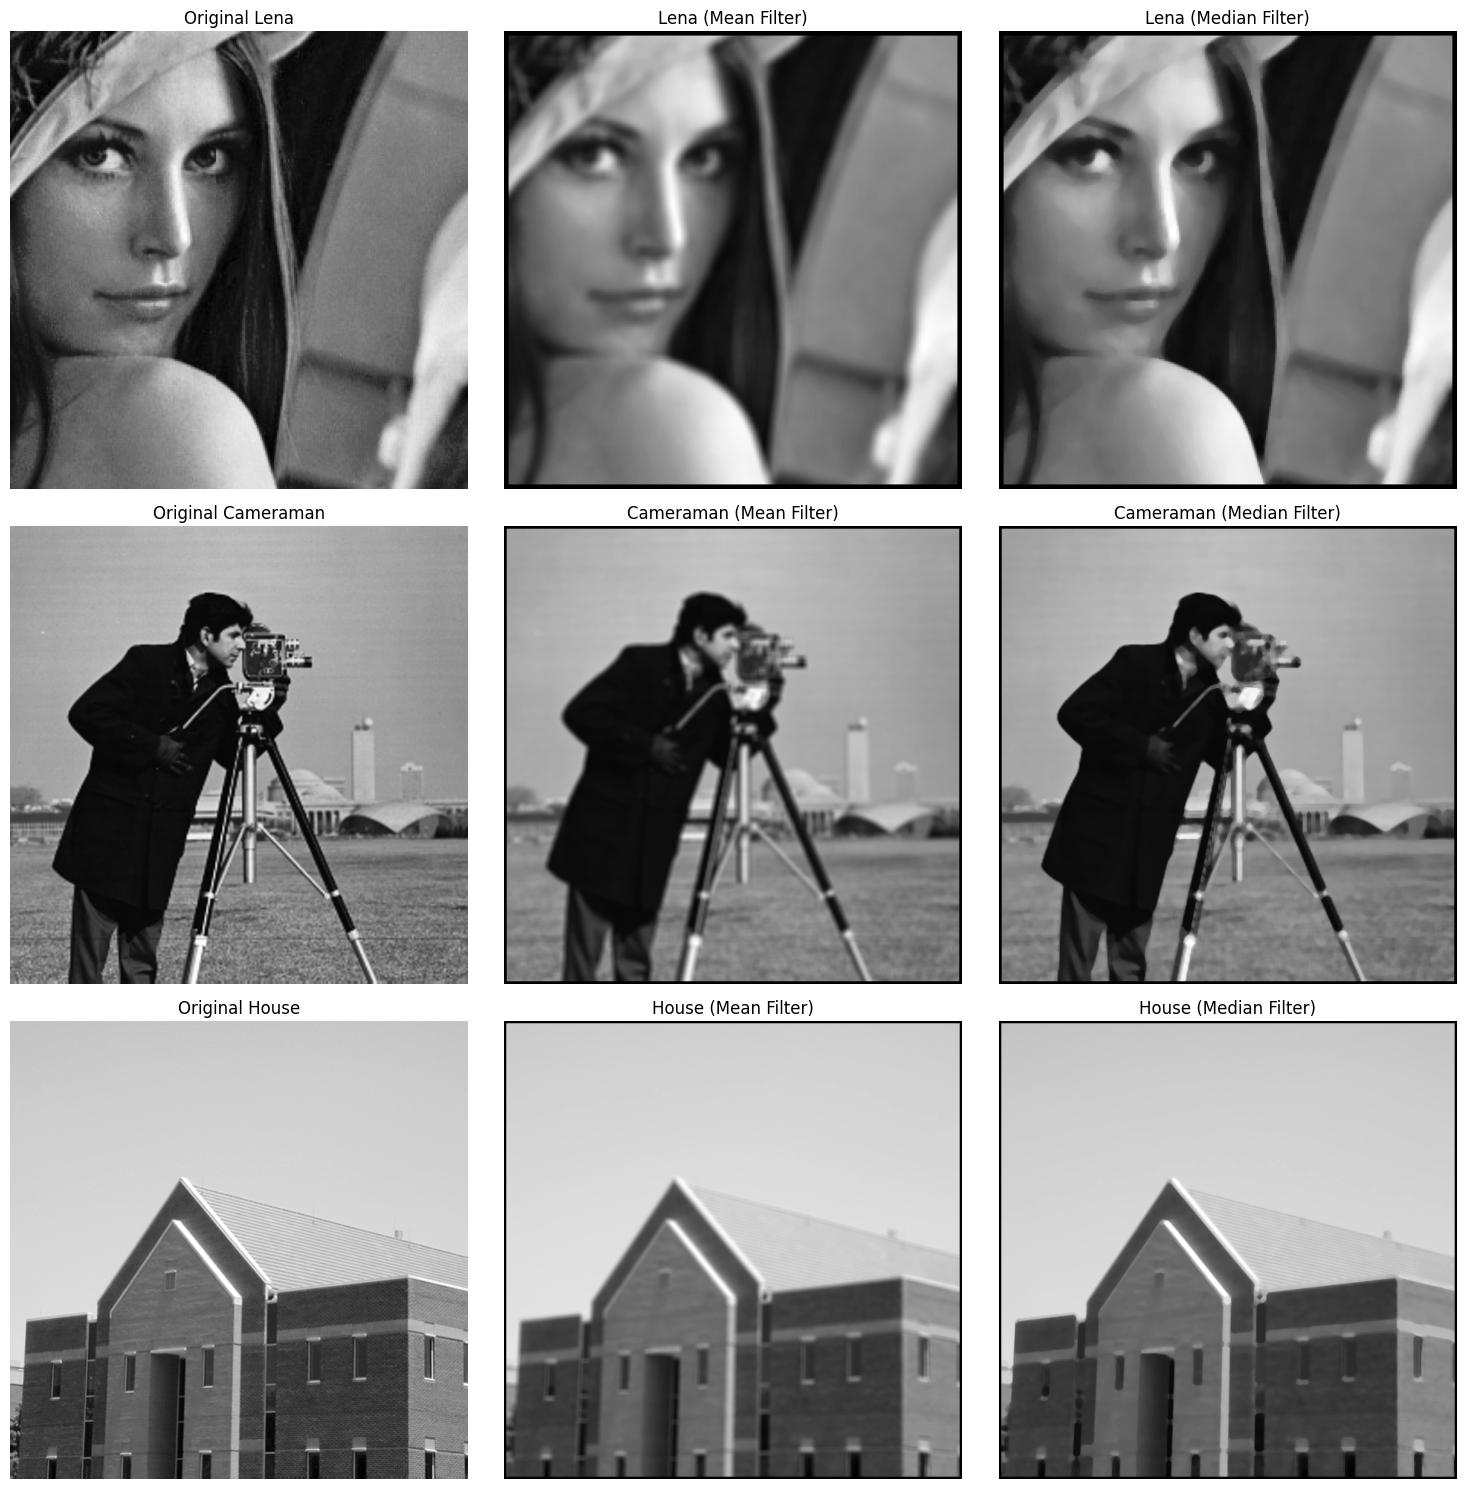

In [7]:

# Load images using Pillow
lena_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/lena.jpg'
cam_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/cameraman.tif'
house_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/house.tif'

lena = np.array(Image.open(lena_path).convert('L'))
cam = np.array(Image.open(cam_path).convert('L'))
house = np.array(Image.open(house_path).convert('L'))

def apply_neighborhood_operation_mean(image, k=3):
    output_image = np.zeros(image.shape)
    l, c = image.shape
    for x in range(k, l-k):
        for y in range(k, c-k):
            s_xy = image[x-k:x+k+1, y-k:y+k+1]
            output_image[x, y] = np.mean(s_xy).astype(int)
    return output_image

def apply_neighborhood_operation_median(image, k=3):
    output_image = np.zeros(image.shape)
    l, c = image.shape
    for x in range(k, l-k):
        for y in range(k, c-k):
            s_xy = image[x-k:x+k+1, y-k:y+k+1]
            output_image[x, y] = np.median(s_xy).astype(int)
    return output_image

# Apply neighborhood operation (mean) to each image
g_image_ndLena_mean = apply_neighborhood_operation_mean(lena)
g_image_ndCam_mean = apply_neighborhood_operation_mean(cam)
g_image_ndHouse_mean = apply_neighborhood_operation_mean(house)

# Apply neighborhood operation (median) to each image
g_image_ndLena_median = apply_neighborhood_operation_median(lena)
g_image_ndCam_median = apply_neighborhood_operation_median(cam)
g_image_ndHouse_median = apply_neighborhood_operation_median(house)

# Display images
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Display Lena images
axs[0, 0].imshow(lena, cmap='gray')
axs[0, 0].set_title('Original Lena')
axs[0, 1].imshow(g_image_ndLena_mean, cmap='gray')
axs[0, 1].set_title('Lena (Mean Filter)')
axs[0, 2].imshow(g_image_ndLena_median, cmap='gray')
axs[0, 2].set_title('Lena (Median Filter)')

# Display Cameraman images
axs[1, 0].imshow(cam, cmap='gray')
axs[1, 0].set_title('Original Cameraman')
axs[1, 1].imshow(g_image_ndCam_mean, cmap='gray')
axs[1, 1].set_title('Cameraman (Mean Filter)')
axs[1, 2].imshow(g_image_ndCam_median, cmap='gray')
axs[1, 2].set_title('Cameraman (Median Filter)')

# Display House images
axs[2, 0].imshow(house, cmap='gray')
axs[2, 0].set_title('Original House')
axs[2, 1].imshow(g_image_ndHouse_mean, cmap='gray')
axs[2, 1].set_title('House (Mean Filter)')
axs[2, 2].imshow(g_image_ndHouse_median, cmap='gray')
axs[2, 2].set_title('House (Median Filter)')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

### Incorporando as Imagens pelo Pillow

Importando Bibliotecas

In [8]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

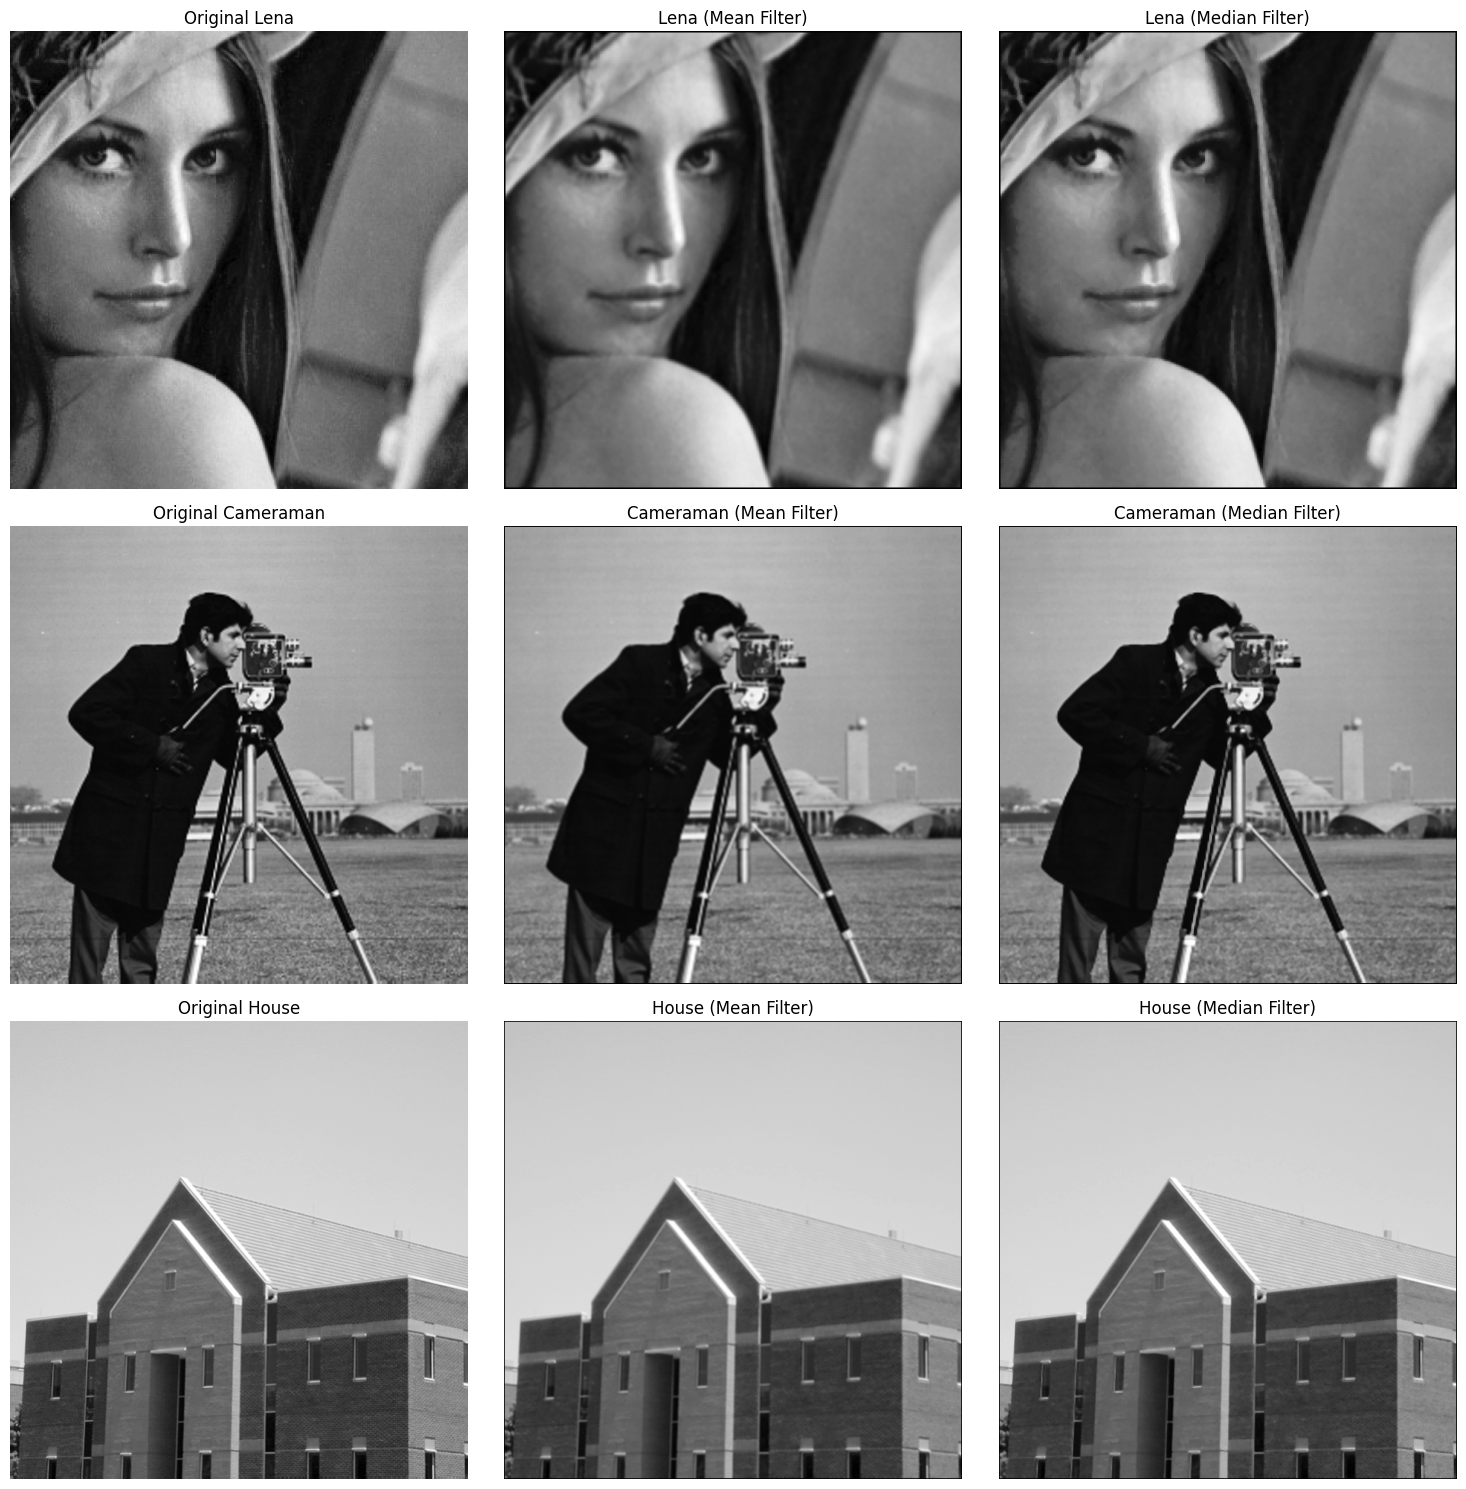

In [9]:
def apply_neighborhood_operation(img, operation='mean'):
    width, height = img.size
    new_img = Image.new('L', (width, height))
    pixels = img.load()
    new_pixels = new_img.load()

    for x in range(1, width-1):
        for y in range(1, height-1):
            # Extract 3x3 neighborhood
            neighborhood = [
                pixels[x-1, y-1], pixels[x, y-1], pixels[x+1, y-1],
                pixels[x-1, y], pixels[x, y], pixels[x+1, y],
                pixels[x-1, y+1], pixels[x, y+1], pixels[x+1, y+1]
            ]
            
            if operation == 'mean':
                new_pixels[x, y] = sum(neighborhood) // 9
            elif operation == 'median':
                new_pixels[x, y] = sorted(neighborhood)[4]

    return new_img

# Load images
lena_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/lena.jpg'
cam_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/cameraman.tif'
house_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/house.tif'

lena = Image.open(lena_path).convert('L')
cam = Image.open(cam_path).convert('L')
house = Image.open(house_path).convert('L')

# Apply neighborhood operation
lena_mean = apply_neighborhood_operation(lena, 'mean')
cam_mean = apply_neighborhood_operation(cam, 'mean')
house_mean = apply_neighborhood_operation(house, 'mean')

lena_median = apply_neighborhood_operation(lena, 'median')
cam_median = apply_neighborhood_operation(cam, 'median')
house_median = apply_neighborhood_operation(house, 'median')

# Display images
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Display Lena images
axs[0, 0].imshow(lena, cmap='gray')
axs[0, 0].set_title('Original Lena')
axs[0, 1].imshow(lena_mean, cmap='gray')
axs[0, 1].set_title('Lena (Mean Filter)')
axs[0, 2].imshow(lena_median, cmap='gray')
axs[0, 2].set_title('Lena (Median Filter)')

# Display Cameraman images
axs[1, 0].imshow(cam, cmap='gray')
axs[1, 0].set_title('Original Cameraman')
axs[1, 1].imshow(cam_mean, cmap='gray')
axs[1, 1].set_title('Cameraman (Mean Filter)')
axs[1, 2].imshow(cam_median, cmap='gray')
axs[1, 2].set_title('Cameraman (Median Filter)')

# Display House images
axs[2, 0].imshow(house, cmap='gray')
axs[2, 0].set_title('Original House')
axs[2, 1].imshow(house_mean, cmap='gray')
axs[2, 1].set_title('House (Mean Filter)')
axs[2, 2].imshow(house_median, cmap='gray')
axs[2, 2].set_title('House (Median Filter)')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


### Incorporando as Imagens pelo OpenCV

Importando Bibliotecas

In [11]:
import cv2
import matplotlib.pyplot as plt

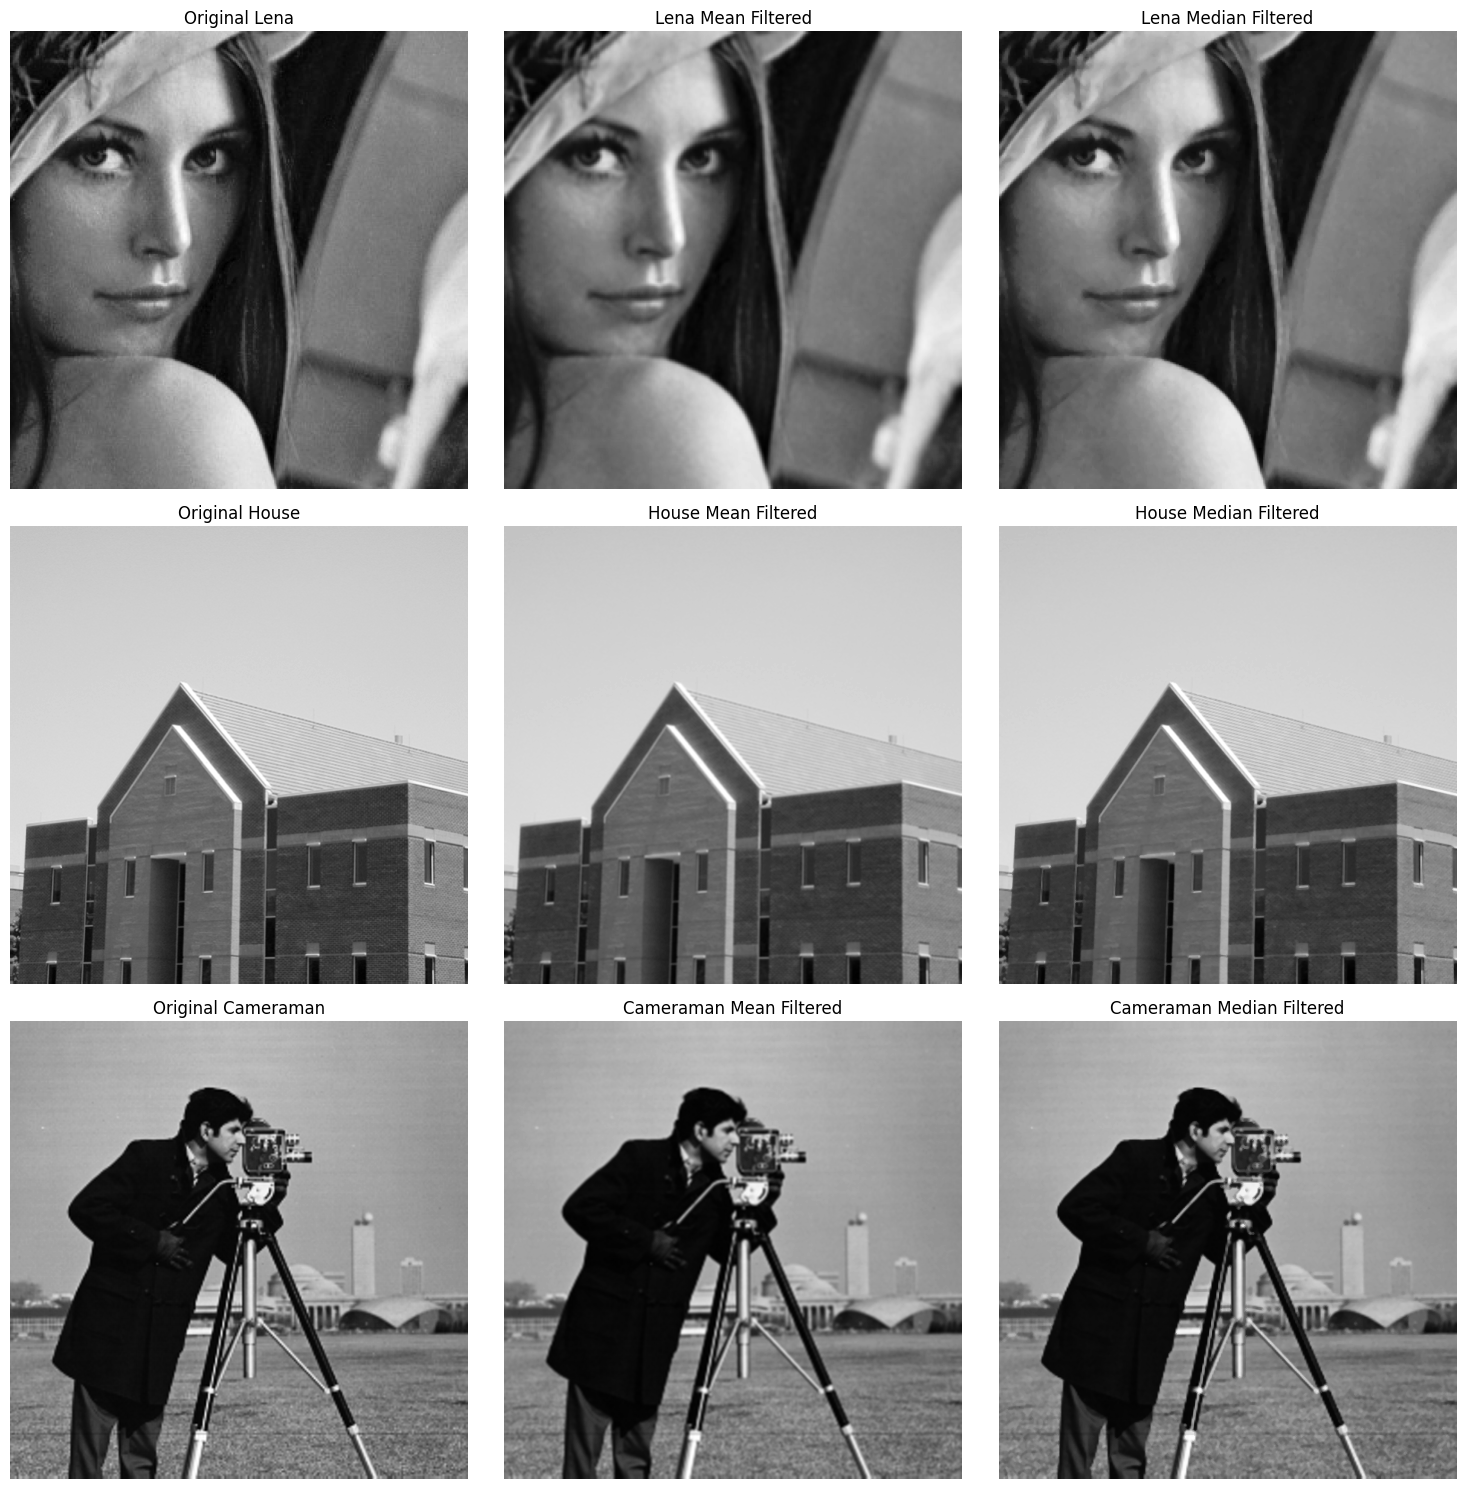

In [12]:


# Load images
lena_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/lena.jpg'
house_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/house.tif'
cam_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/cameraman.tif'

lena = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)
house = cv2.imread(house_path, cv2.IMREAD_GRAYSCALE)
cam = cv2.imread(cam_path, cv2.IMREAD_GRAYSCALE)

# Apply mean and median filtering using 3x3 kernel
lena_mean = cv2.blur(lena, (3,3))
lena_median = cv2.medianBlur(lena, 3)

house_mean = cv2.blur(house, (3,3))
house_median = cv2.medianBlur(house, 3)

cam_mean = cv2.blur(cam, (3,3))
cam_median = cv2.medianBlur(cam, 3)

# Display images
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs[0, 0].imshow(lena, cmap='gray')
axs[0, 0].set_title('Original Lena')
axs[0, 1].imshow(lena_mean, cmap='gray')
axs[0, 1].set_title('Lena Mean Filtered')
axs[0, 2].imshow(lena_median, cmap='gray')
axs[0, 2].set_title('Lena Median Filtered')

axs[1, 0].imshow(house, cmap='gray')
axs[1, 0].set_title('Original House')
axs[1, 1].imshow(house_mean, cmap='gray')
axs[1, 1].set_title('House Mean Filtered')
axs[1, 2].imshow(house_median, cmap='gray')
axs[1, 2].set_title('House Median Filtered')

axs[2, 0].imshow(cam, cmap='gray')
axs[2, 0].set_title('Original Cameraman')
axs[2, 1].imshow(cam_mean, cmap='gray')
axs[2, 1].set_title('Cameraman Mean Filtered')
axs[2, 2].imshow(cam_median, cmap='gray')
axs[2, 2].set_title('Cameraman Median Filtered')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

## Utilizando a Biblioteca Scipy

Importando Biblioteca

In [15]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage


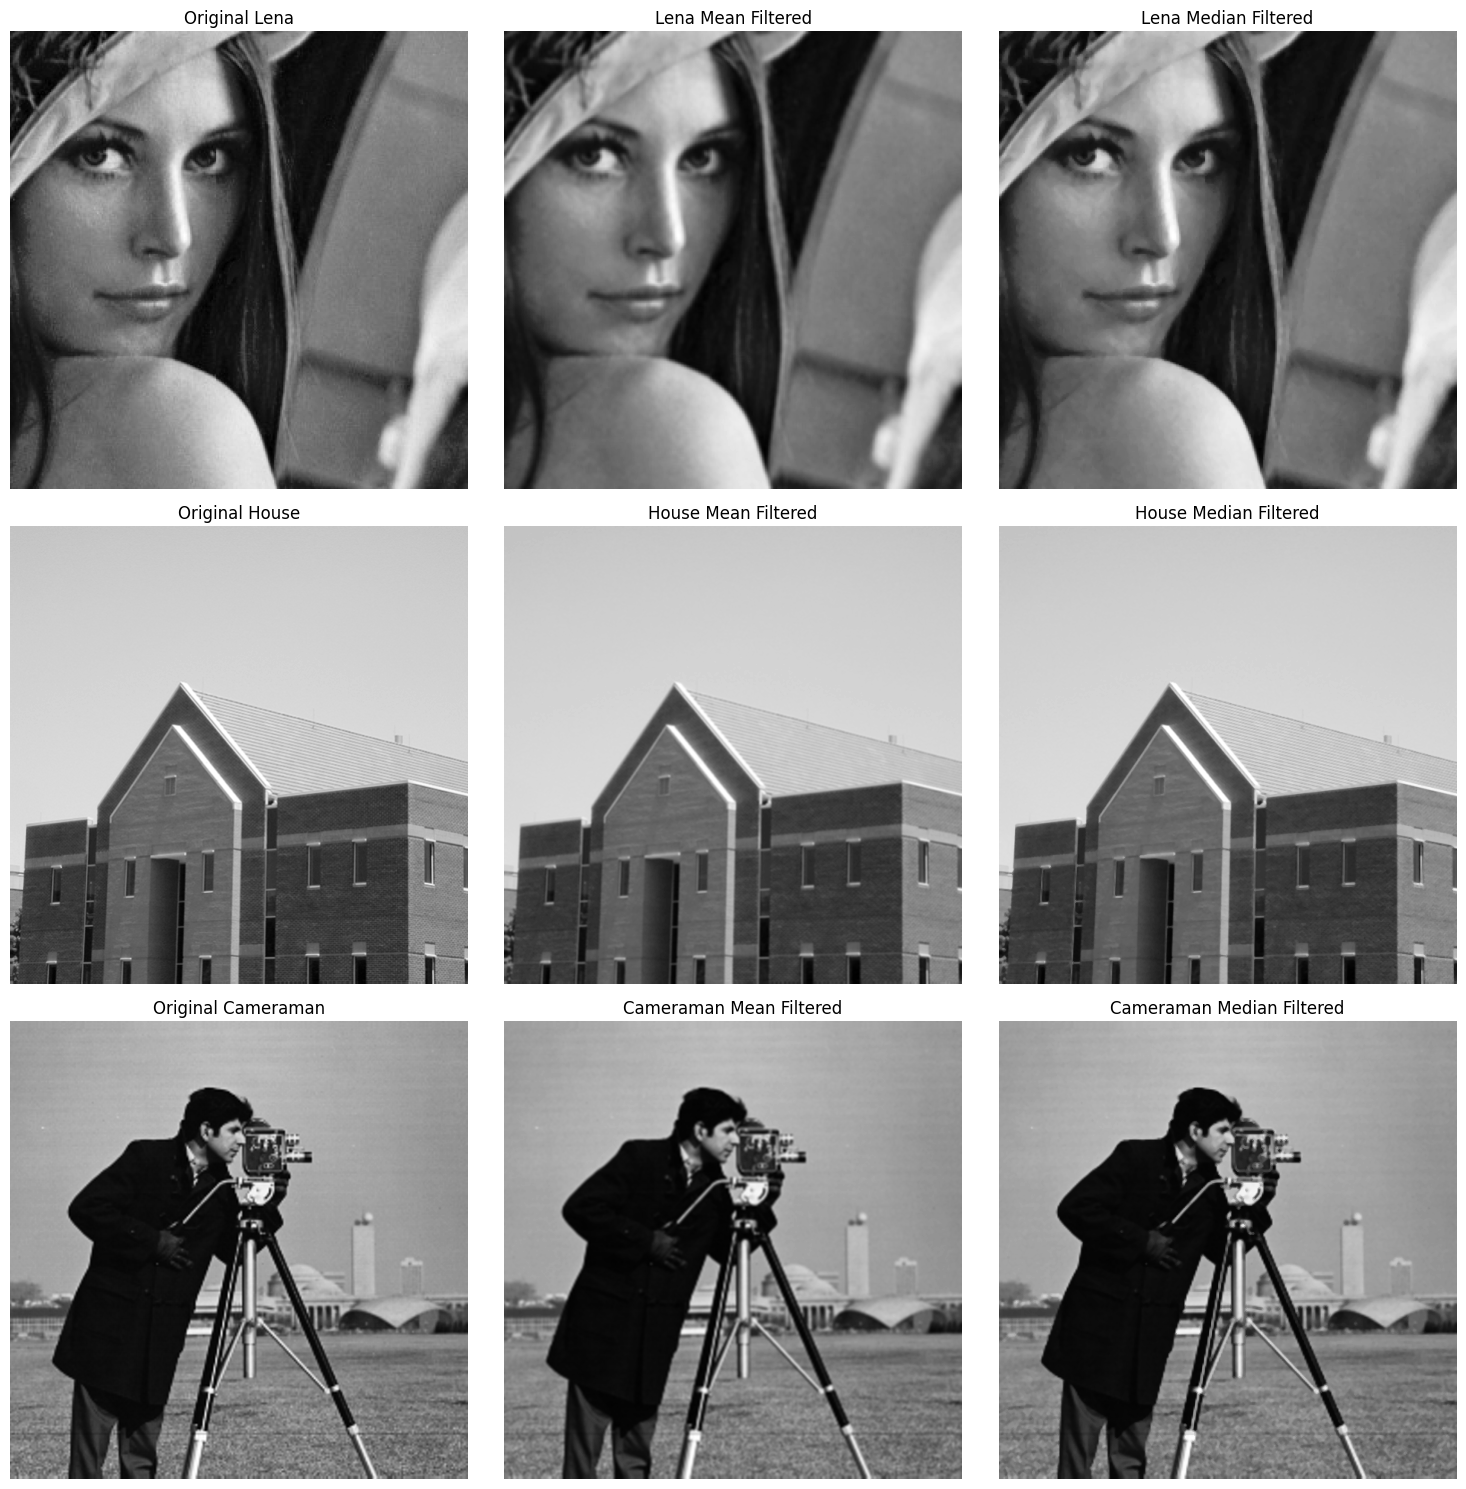

In [16]:
# Load images
lena_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/lena.jpg'
house_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/house.tif'
cam_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 4/images/cameraman.tif'

lena = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)
house = cv2.imread(house_path, cv2.IMREAD_GRAYSCALE)
cam = cv2.imread(cam_path, cv2.IMREAD_GRAYSCALE)

# Apply mean filtering using 3x3 kernel
kernel = [[1/9, 1/9, 1/9],
          [1/9, 1/9, 1/9],
          [1/9, 1/9, 1/9]]

lena_mean = ndimage.convolve(lena, kernel)
house_mean = ndimage.convolve(house, kernel)
cam_mean = ndimage.convolve(cam, kernel)

# Apply median filtering using 3x3 kernel
lena_median = ndimage.median_filter(lena, size=3)
house_median = ndimage.median_filter(house, size=3)
cam_median = ndimage.median_filter(cam, size=3)

# Display images
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs[0, 0].imshow(lena, cmap='gray')
axs[0, 0].set_title('Original Lena')
axs[0, 1].imshow(lena_mean, cmap='gray')
axs[0, 1].set_title('Lena Mean Filtered')
axs[0, 2].imshow(lena_median, cmap='gray')
axs[0, 2].set_title('Lena Median Filtered')

axs[1, 0].imshow(house, cmap='gray')
axs[1, 0].set_title('Original House')
axs[1, 1].imshow(house_mean, cmap='gray')
axs[1, 1].set_title('House Mean Filtered')
axs[1, 2].imshow(house_median, cmap='gray')
axs[1, 2].set_title('House Median Filtered')

axs[2, 0].imshow(cam, cmap='gray')
axs[2, 0].set_title('Original Cameraman')
axs[2, 1].imshow(cam_mean, cmap='gray')
axs[2, 1].set_title('Cameraman Mean Filtered')
axs[2, 2].imshow(cam_median, cmap='gray')
axs[2, 2].set_title('Cameraman Median Filtered')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()